In [ ]:
#Importing the required libraries:
import os
import sys
import torch
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import OrderedDict
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
os.chdir("dir/Evaluation/LensFinding/")
print("Changed directory to:", os.getcwd())  # Verify the change

Changed directory to: /content/drive/MyDrive/Hari/Evaluation/LensFinding


In [ ]:
# Loading the train dataset
train_data = np.load("dir/LensFinding/data/train_data.npz")
train_images, train_labels = train_data["images"], train_data["labels"]

# Loading the test dataset
val_data = np.load("dir/LensFinding/data/test_data.npz")
val_images, val_labels = val_data["images"], val_data["labels"]


In [ ]:
#Making a Test set from the Validation dataset:
from sklearn.model_selection import train_test_split

# Split into new validation (80%) and test (20%)
val_images, test_images, val_labels, test_labels = train_test_split(
    val_images, val_labels, test_size=0.20, stratify=val_labels, random_state=42
)


In [ ]:
print(f"Train set: {train_images.shape}, Labels: {train_labels.shape}")
print(f"Validation set: {val_images.shape}, Labels: {val_labels.shape}")
print(f"Test set: {test_images.shape}, Labels: {test_labels.shape}")

Train set: (30405, 3, 64, 64), Labels: (30405,)
Validation set: (15720, 3, 64, 64), Labels: (15720,)
Test set: (3930, 3, 64, 64), Labels: (3930,)


In [ ]:
from torch.utils.data import TensorDataset, DataLoader

# Convert to PyTorch tensors
train_images_tensor = torch.tensor(train_images, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_labels, dtype=torch.long)

val_images_tensor = torch.tensor(val_images, dtype=torch.float32)
val_labels_tensor = torch.tensor(val_labels, dtype=torch.long)

test_images_tensor = torch.tensor(val_images, dtype=torch.float32)
test_labels_tensor = torch.tensor(val_labels, dtype=torch.long)

# Create TensorDataset
train_dataset = TensorDataset(train_images_tensor, train_labels_tensor)
val_dataset = TensorDataset(val_images_tensor, val_labels_tensor)
test_dataset = TensorDataset(test_images_tensor, test_labels_tensor)

# Create DataLoaders
batch_size = 200
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

# Check a batch
for images, labels in train_loader:
    print(f"Batch shape: {images.shape}, Labels shape: {labels.shape}")
    break


Batch shape: torch.Size([200, 3, 64, 64]), Labels shape: torch.Size([200])


In [ ]:
sys.path.append("./src")

In [ ]:
from model import ResNet32
from train import train_model

In [ ]:
start_time = time.time()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResNet32().to(device)
end_time = time.time()
print(f"Model loaded! Time taken: {end_time - start_time:.2f} sec")

Model loaded! Time taken: 0.31 sec


In [ ]:
epochs = 20
learning_rate = 0.0001

In [ ]:
train_losses, val_losses, train_accs, val_accs, val_aucs = train_model(
    model, train_loader, val_loader, device, epochs, learning_rate
)

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:28: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler()


Training started!

 Epoch 1/20 started


Epoch 1 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 1 Training: 100%|██████████| 153/153 [00:21<00:00,  7.19it/s]


📊 [Epoch 1/20] Train Loss: 0.808089 | Train Acc: 0.377 | Val Loss: 1.181278 | Val Acc: 0.670 | Val AUC: 0.9032
Saved new best model with Val AUC: 0.9032

 Epoch 2/20 started


Epoch 2 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 2 Training: 100%|██████████| 153/153 [00:19<00:00,  7.87it/s]


📊 [Epoch 2/20] Train Loss: 0.758713 | Train Acc: 0.519 | Val Loss: 1.208082 | Val Acc: 0.467 | Val AUC: 0.9485
Saved new best model with Val AUC: 0.9485

 Epoch 3/20 started


Epoch 3 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 3 Training: 100%|██████████| 153/153 [00:19<00:00,  7.97it/s]


📊 [Epoch 3/20] Train Loss: 0.739421 | Train Acc: 0.575 | Val Loss: 1.206432 | Val Acc: 0.297 | Val AUC: 0.9367

 Epoch 4/20 started


Epoch 4 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 4 Training: 100%|██████████| 153/153 [00:19<00:00,  7.79it/s]


📊 [Epoch 4/20] Train Loss: 0.728059 | Train Acc: 0.613 | Val Loss: 1.213946 | Val Acc: 0.910 | Val AUC: 0.8858

 Epoch 5/20 started


Epoch 5 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 5 Training: 100%|██████████| 153/153 [00:20<00:00,  7.59it/s]


📊 [Epoch 5/20] Train Loss: 0.713316 | Train Acc: 0.652 | Val Loss: 1.142981 | Val Acc: 0.715 | Val AUC: 0.9561
Saved new best model with Val AUC: 0.9561

 Epoch 6/20 started


Epoch 6 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 6 Training: 100%|██████████| 153/153 [00:20<00:00,  7.54it/s]


📊 [Epoch 6/20] Train Loss: 0.709258 | Train Acc: 0.657 | Val Loss: 1.141868 | Val Acc: 0.677 | Val AUC: 0.9573
Saved new best model with Val AUC: 0.9573

 Epoch 7/20 started


Epoch 7 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 7 Training: 100%|██████████| 153/153 [00:20<00:00,  7.58it/s]


📊 [Epoch 7/20] Train Loss: 0.703924 | Train Acc: 0.683 | Val Loss: 1.137899 | Val Acc: 0.720 | Val AUC: 0.9550

 Epoch 8/20 started


Epoch 8 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 8 Training: 100%|██████████| 153/153 [00:20<00:00,  7.64it/s]


📊 [Epoch 8/20] Train Loss: 0.706551 | Train Acc: 0.688 | Val Loss: 1.138425 | Val Acc: 0.744 | Val AUC: 0.9580
Saved new best model with Val AUC: 0.9580

 Epoch 9/20 started


Epoch 9 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 9 Training: 100%|██████████| 153/153 [00:20<00:00,  7.61it/s]


📊 [Epoch 9/20] Train Loss: 0.701637 | Train Acc: 0.695 | Val Loss: 1.133215 | Val Acc: 0.696 | Val AUC: 0.9538

 Epoch 10/20 started


Epoch 10 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 10 Training: 100%|██████████| 153/153 [00:20<00:00,  7.59it/s]


📊 [Epoch 10/20] Train Loss: 0.698164 | Train Acc: 0.703 | Val Loss: 1.133310 | Val Acc: 0.654 | Val AUC: 0.9563

 Epoch 11/20 started


Epoch 11 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 11 Training: 100%|██████████| 153/153 [00:20<00:00,  7.60it/s]


📊 [Epoch 11/20] Train Loss: 0.697238 | Train Acc: 0.713 | Val Loss: 1.145715 | Val Acc: 0.581 | Val AUC: 0.9514

 Epoch 12/20 started


Epoch 12 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 12 Training: 100%|██████████| 153/153 [00:20<00:00,  7.59it/s]


📊 [Epoch 12/20] Train Loss: 0.696759 | Train Acc: 0.719 | Val Loss: 1.149162 | Val Acc: 0.614 | Val AUC: 0.9528

 Epoch 13/20 started


Epoch 13 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 13 Training: 100%|██████████| 153/153 [00:20<00:00,  7.56it/s]


📊 [Epoch 13/20] Train Loss: 0.693763 | Train Acc: 0.732 | Val Loss: 1.130603 | Val Acc: 0.701 | Val AUC: 0.9422

 Epoch 14/20 started


Epoch 14 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 14 Training: 100%|██████████| 153/153 [00:20<00:00,  7.57it/s]


📊 [Epoch 14/20] Train Loss: 0.692027 | Train Acc: 0.730 | Val Loss: 1.135890 | Val Acc: 0.697 | Val AUC: 0.9490

 Epoch 15/20 started


Epoch 15 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 15 Training: 100%|██████████| 153/153 [00:20<00:00,  7.53it/s]


📊 [Epoch 15/20] Train Loss: 0.692046 | Train Acc: 0.733 | Val Loss: 1.134137 | Val Acc: 0.706 | Val AUC: 0.9530

 Epoch 16/20 started


Epoch 16 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 16 Training: 100%|██████████| 153/153 [00:20<00:00,  7.56it/s]


📊 [Epoch 16/20] Train Loss: 0.690552 | Train Acc: 0.737 | Val Loss: 1.134280 | Val Acc: 0.743 | Val AUC: 0.9491

 Epoch 17/20 started


Epoch 17 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 17 Training: 100%|██████████| 153/153 [00:20<00:00,  7.56it/s]


📊 [Epoch 17/20] Train Loss: 0.687216 | Train Acc: 0.740 | Val Loss: 1.129381 | Val Acc: 0.768 | Val AUC: 0.9530

 Epoch 18/20 started


Epoch 18 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 18 Training: 100%|██████████| 153/153 [00:20<00:00,  7.57it/s]


📊 [Epoch 18/20] Train Loss: 0.686813 | Train Acc: 0.739 | Val Loss: 1.147438 | Val Acc: 0.679 | Val AUC: 0.9601
Saved new best model with Val AUC: 0.9601

 Epoch 19/20 started


Epoch 19 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 19 Training: 100%|██████████| 153/153 [00:20<00:00,  7.58it/s]


📊 [Epoch 19/20] Train Loss: 0.689107 | Train Acc: 0.736 | Val Loss: 1.133687 | Val Acc: 0.724 | Val AUC: 0.9511

 Epoch 20/20 started


Epoch 20 Training:   0%|          | 0/153 [00:00<?, ?it/s]/content/drive/MyDrive/Hari/Evaluation/LensFinding/./src/train.py:46: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():  # Mixed-precision for efficiency
Epoch 20 Training: 100%|██████████| 153/153 [00:20<00:00,  7.60it/s]


📊 [Epoch 20/20] Train Loss: 0.693608 | Train Acc: 0.736 | Val Loss: 1.129796 | Val Acc: 0.753 | Val AUC: 0.9502


In [ ]:
print("Train_Losses : \n",train_losses)
print("Val_Losses :  \n",val_losses)
print("Train_Accs :  \n",train_accs)
print("Val_Accs :  \n",val_accs)
print("Val_AUCs : \n",val_aucs)

Train_Losses : 
 [0.8080887730292948, 0.758712779165118, 0.7394208835939929, 0.7280591242095001, 0.7133164495215019, 0.7092584899686861, 0.7039237687940995, 0.7065514465476941, 0.7016370330196406, 0.6981636213640735, 0.6972383575756247, 0.696758519268177, 0.6937630660752289, 0.6920269799259928, 0.692045933948185, 0.6905524093566453, 0.6872156973909223, 0.6868129805737548, 0.6891071772892956, 0.6936077533672366]
Val_Losses :  
 [1.1812782205698145, 1.2080820459142592, 1.2064316133203095, 1.213945578224483, 1.1429806413844645, 1.1418684068830263, 1.1378994697832878, 1.1384254736451398, 1.1332154378636192, 1.1333104456957364, 1.1457153325165805, 1.149161654877602, 1.1306026693215503, 1.135889567188331, 1.1341373968973718, 1.1342803477937635, 1.129381362263483, 1.1474379942617343, 1.1336870700045094, 1.1297955189952413]
Train_Accs :  
 [0.3766814668640026, 0.5191580332182207, 0.5753987830948857, 0.6125966123992764, 0.6519651373129419, 0.6571616510442362, 0.6825851011346818, 0.6876500575563

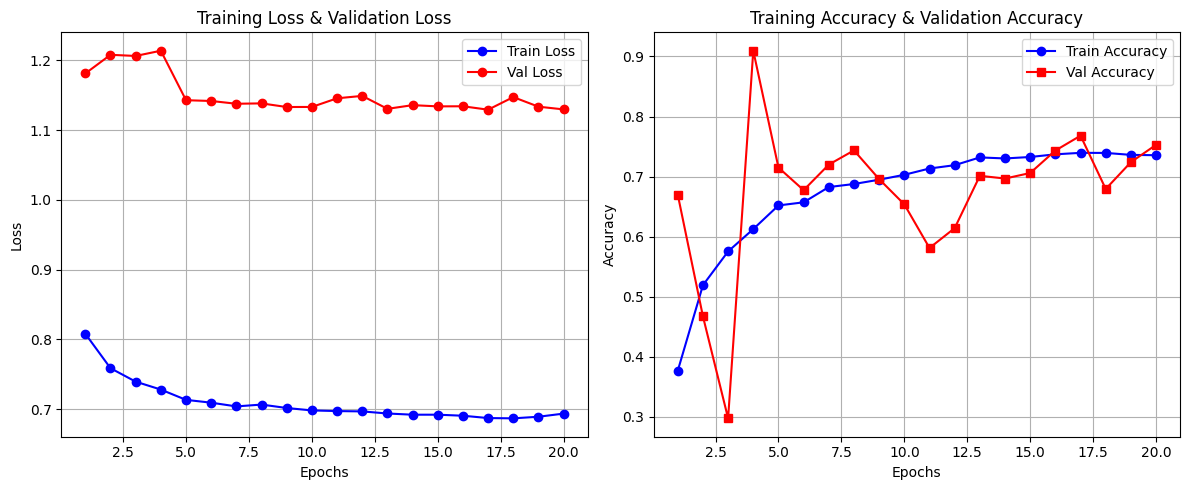

In [ ]:
epochs_ = range(1,len(train_losses)+1)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_, train_losses, label="Train Loss", marker="o", color="blue")
plt.plot(epochs_, val_losses, label="Val Loss", marker="o", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss & Validation Loss")
plt.legend()
plt.grid(True)

# Plot Validation Loss & Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_, train_accs, label="Train Accuracy", marker="o", color="blue")
plt.plot(epochs_, val_accs, label="Val Accuracy", marker="s", color="red")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy & Validation Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import torch
import numpy as np
import matplotlib.pyplot as plt

def evaluate_model_on_test(model, test_loader, device):
    model.eval()  # Set model to evaluation mode
    model.to(device)

    all_labels = []
    all_probs = []
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Get model outputs
            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1)  # Convert logits to probabilities
            predicted = torch.argmax(probs, dim=1)

            # Store labels and probabilities
            all_labels.extend(labels.cpu().numpy())  # True labels
            all_probs.extend(probs.cpu().numpy())  # Probabilities for both classes

            # Compute accuracy
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    # Convert lists to NumPy arrays
    all_labels = np.array(all_labels)
    all_probs = np.array(all_probs)

    # Compute overall accuracy
    test_accuracy = correct / total

    # Compute AUC for both classes (One-vs-Rest)
    auc_class_1 = roc_auc_score(all_labels, all_probs[:, 1])  # AUC for Lenses (Class 1)
    auc_class_0 = roc_auc_score(1 - all_labels, all_probs[:, 0])  # AUC for Non-Lenses (Class 0)

    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"AUC for Non-Lenses (Class 0): {auc_class_0:.4f}")
    print(f"AUC for Lenses (Class 1): {auc_class_1:.4f}")

    # Plot ROC Curves
    fpr_0, tpr_0, _ = roc_curve(all_labels, all_probs[:, 0], pos_label=0)  # Non-lenses
    fpr_1, tpr_1, _ = roc_curve(all_labels, all_probs[:, 1], pos_label=1)  # Lenses

    plt.figure(figsize=(8, 6))
    plt.plot(fpr_0, tpr_0, label=f'Non-Lenses (Class 0) AUC={auc_class_0:.4f}', color='blue')
    plt.plot(fpr_1, tpr_1, label=f'Lenses (Class 1) AUC={auc_class_1:.4f}', color='red')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for Test Set")
    plt.legend()
    plt.grid()
    plt.show()

    return test_accuracy, (auc_class_0, auc_class_1)


Test Accuracy: 0.6794
AUC for Non-Lenses (Class 0): 0.9601
AUC for Lenses (Class 1): 0.9601


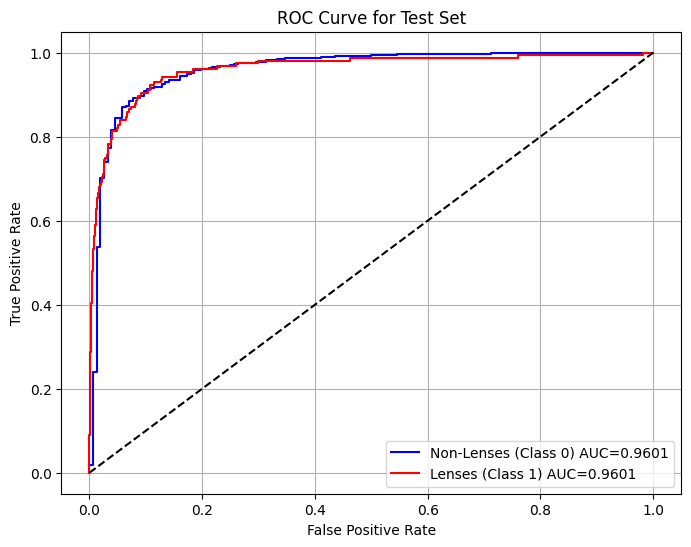

In [ ]:
model.load_state_dict(torch.load("dir/LensFinding/results/best_model.pth"))  # Renamed this model weights file as "./results/train_1_re.pth" .
test_accuracy, test_auc_scores = evaluate_model_on_test(model, test_loader, device)

The Accuracy seems to be low, but the AUC scores are high, this is quite contrary to what one would expect. Since , there exists a severe data imbalance, so we expect the accuracy to be pretty high since the model learns to correctly classify the abundant label and hence has higher test accuracy. However our weighted loss made sure that the model learns to classify both labels equally.